In [2]:
import scipy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn

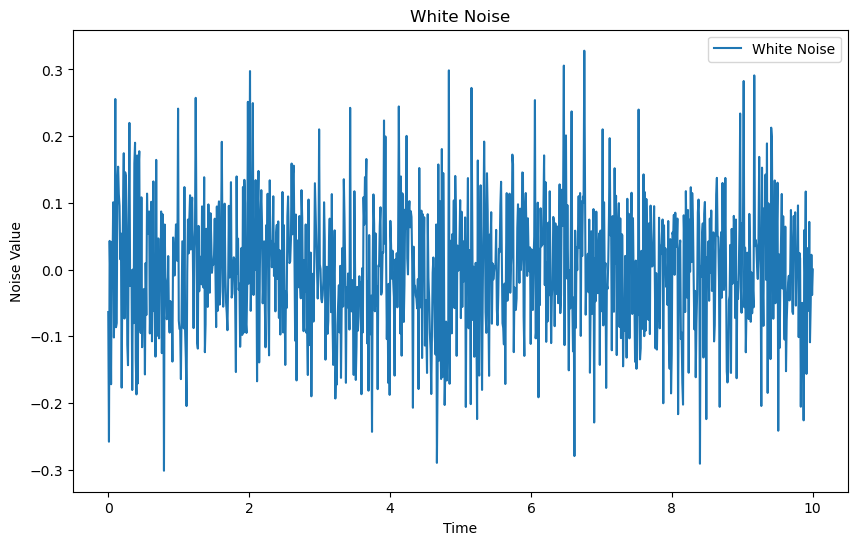

In [49]:
#White noise 

mu=0 # mean 

N=1000 #  number of steps
T=10 # time frame end
sigma=dt = T/N
dw=np.random.normal(mu,np.sqrt(dt),N) # generate random normally distributed white noise

time_points=np.linspace(0, T, num=N, endpoint=True) # X-values
#print(time_points) # with difference of 0.01 or ( T/N)

plt.figure(figsize=(10, 6))
plt.plot(time_points, dw, label="White Noise")
plt.title("White Noise")
plt.xlabel("Time")
plt.ylabel("Noise Value")
plt.legend()
plt.show()

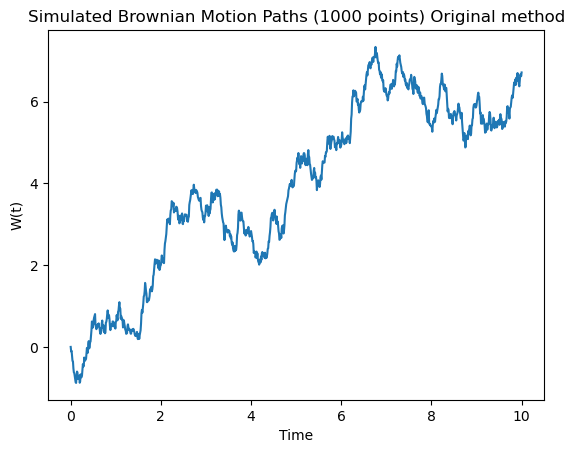

In [50]:
# Original Brownian motion 
N=1000
T=10
mu=0
sigma=0.1 # time step
dt=T/N
# Generate the random increments (dW) for Brownian motion
dW=np.random.normal(mu,np.sqrt(dt),size=N)

# Initialize an array for W(t) with zeros (with size N+1 to include the initial value W(0) = 0)
W = np.zeros(N + 1)

for i in range(1,N+1):
    W[i]=W[i - 1] + dW[i - 1] # 0 + dw , dw +dw2 np.cumsum
time_points = np.linspace(0,T,num=N+1,endpoint=True) # X-values add 1 more point as we insurted in W to initialize in 0 
plt.plot(time_points,W)

plt.title("Simulated Brownian Motion Paths (1000 points) Original method")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.show()

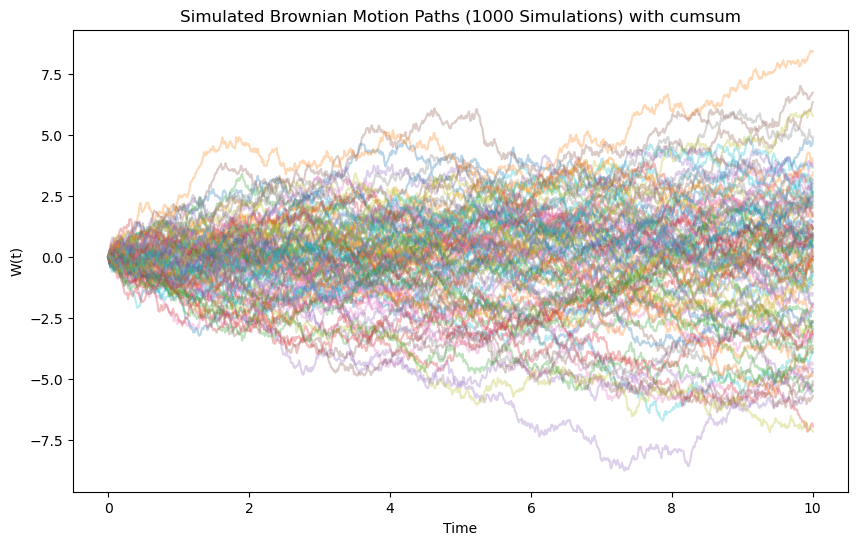

In [4]:
# Brownian_motion with np.cumsum()
import numpy as np
import matplotlib.pyplot as plt

# Define the Brownian Motion function
def Brownian_Motion(N, T):
    mu = 0
    sigma = 1  # You can set sigma separately for clarity
    dt = T / N

    # Generate random normal increments for the Brownian motion
    dW = np.random.normal(mu, np.sqrt(dt), size=N)
    W = np.cumsum(dW)  # Cumulative sum to create the Brownian motion path

    # Include the initial value W(0) = 0
    W = np.insert(W, 0, 0)
    time_points = np.linspace(0, T, num=N+1, endpoint=True)  # Time points for the X-axis

    plt.plot(time_points, W, alpha=0.3)  # Plot the Brownian motion with some transparency

# Plot 1000 Brownian Motion paths on the same figure
plt.figure(figsize=(10, 6)) 
#The plt.figure(figsize=(10, 6)) command sets up the figure size before plotting, ensuring all paths are plotted on the same graph.


for _ in range(100):
    Brownian_Motion(1000, 10)

plt.title("Simulated Brownian Motion Paths (1000 Simulations) with cumsum")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.show()

In [17]:

def fft_brownian_motion(T, N):
    """
    Fast Fourier Transform Brownian Motion
    
    Parameters:
    T : float - Total time (years or seconds etc) 
    N : int - Number of time steps
    
    Returns:
    time_points : numpy array - Array of time points
    W : numpy array - Brownian motion values at each time point
    """
    dt = T / N  # Time step
    time_points = np.linspace(0, T, N)  # Array of time points
    
    # Step 1: Generate Gaussian white noise in the time domain
    Z = np.random.normal(0, 1, N)
    
    # Step 2: Apply FFT to the white noise
    Z_fft = np.fft.fft(Z)
    
    # Step 3: Inverse FFT and scaling by sqrt(dt) to obtain increments
    W_increments = np.fft.ifft(Z_fft) * np.sqrt(dt)
    
    # Step 4: Calculate Brownian motion by cumulative sum of increments
    W = np.cumsum(W_increments.real)  # We only use the real part
    
    # Insert W(0) = 0 for the initial Brownian motion value
    W = np.insert(W, 0, 0)
    time_points = np.insert(time_points, 0, 0)  # Adjust time points for initial value
    
    return time_points, W


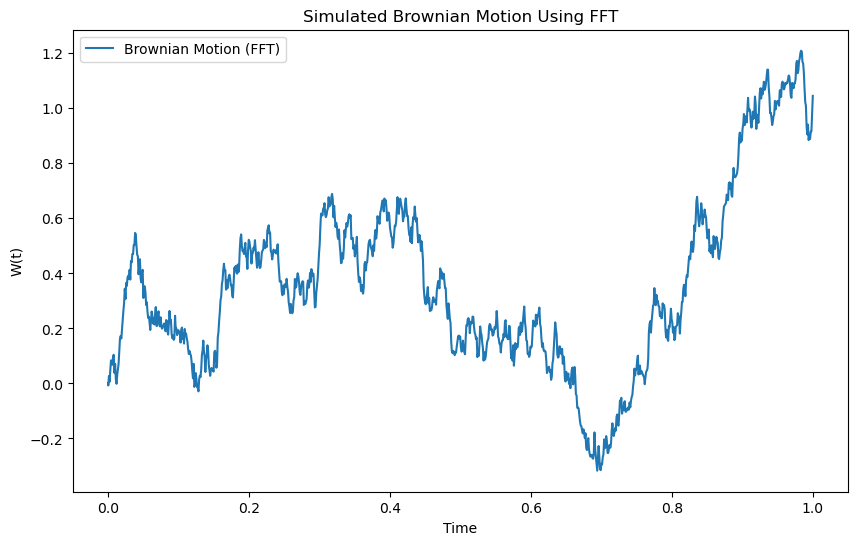

In [18]:
# Parameters
T = 1  # Total time (e.g., 1 year)
N = 1024  # Number of time steps

# Generate Brownian motion path using FFT
time_points, W = fft_brownian_motion(T, N)

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(time_points, W, label="Brownian Motion (FFT)")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.title("Simulated Brownian Motion Using FFT")
plt.legend()
plt.show()

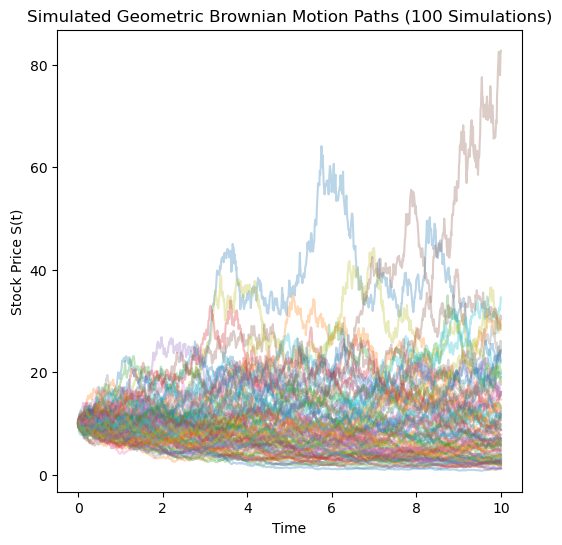

In [5]:
# Geometric Brownian motion


# Brownian_motion with np.cumsum()
def GBM(N,T):
    mu=0.01
    sigma=0.3
    dt=T/N # time step

    dW=np.random.normal(0,np.sqrt(dt),size=N)
   
    W=np.cumsum(dW) # the sum of all previous values W(t)-w(s) from previous increments
    
    t=time_points = np.linspace(0,T,N,endpoint=True) # X-axis points 

    S_o= 10 # Intitial Stock price

    S=S_o*np.exp((mu-0.5*sigma**2) * time_points + sigma*W)# W should be applied over the entire period 
                                                 # up to time 𝑡 not just for a single time step 𝑑𝑡
    
    plt.plot(time_points,S, alpha=0.3)
    
plt.figure(figsize=(6, 6)) # plot on the same graph the paths 

# Plot 100 Geometric Brownian Motion paths on the same figure
for _ in range(100):
    GBM(1000, 10)

plt.title("Simulated Geometric Brownian Motion Paths (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()


In [ ]:
#  Ornstein-Uhlenbeck (OU) Process 

                                                ** Ornstein-Uhlenbeck (OU) Process ** 

$$
dS_t = k(\theta - S_t)dt + \sigma dW_t
$$

$k$: speed of mean-reversion    \
 $\theta$ : long run equilibrium asset level  \
 $\sigma$ : volatility parameter  

In [18]:
# Parameters
Time = 10           # Total time T
N_steps = 10000     # Number of steps N
dt = Time / N_steps # Time increment
mu = 0              # Mean
k = 2             # Mean reversion rate
theta = 0.5         # Long-term mean
S_0 = 100           # Initial value
sigma = 0.1         # Volatility


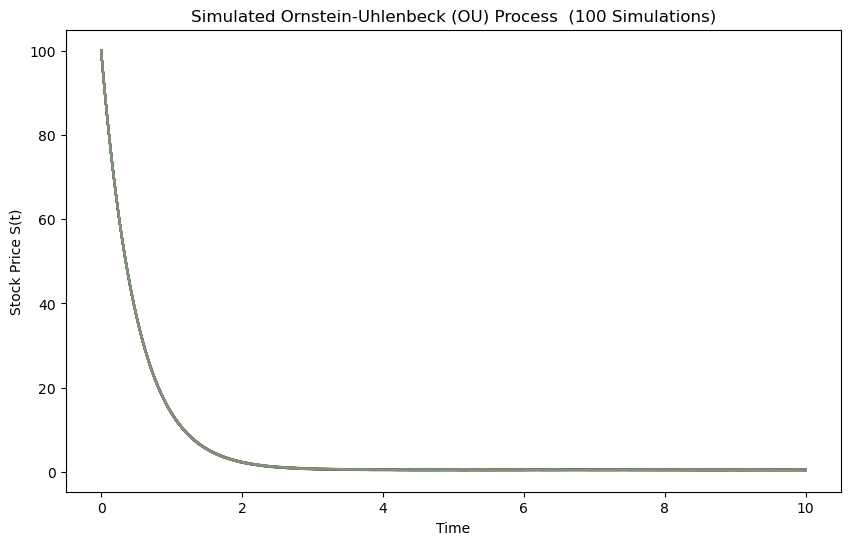

In [19]:
# Function to simulate one path of the OU process
def OU_process(Time, N_steps, dt, mu, k, theta, S_0, sigma):
    # Initialize arrays
    S_t = np.zeros(N_steps)
    S_t[0] = S_0
    dW = np.random.normal(mu, np.sqrt(dt), size=N_steps)  # Brownian increments

    # Simulate the OU process iteratively
    for i in range(1, N_steps):
        S_t[i] = S_t[i-1] + k * (theta - S_t[i-1]) * dt + sigma * dW[i]

    # Time points for plotting
    time_points = np.linspace(0, Time, N_steps, endpoint=True)
    return time_points, S_t

# Plot 100 OU paths on the same figure
plt.figure(figsize=(10, 6))
for _ in range(100):
    time_points, S_t = OU_process(Time, N_steps, dt, mu, k, theta, S_0, sigma)
    plt.plot(time_points, S_t, alpha=0.3)

plt.title("Simulated Ornstein-Uhlenbeck (OU) Process  (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()


                                                ** Cox-Ingersol-Ross (CIR) ** 

$$
dS_t = k(\theta - S_t)dt + \sigma \sqrt{S_t} dW_t
$$

$k$: speed of mean-reversion    \
 $\theta$ : long run equilibrium asset level  \
 $\sigma$ : volatility parameter  

In [25]:
# Set parameters
Time = 10  # Total time T
N_steps = 10000  # Number of steps N
dt = Time / N_steps  # Time step
mu = 0  # Mean
k = 0.3  # Mean-reversion speed
theta = 2  # Long-term mean
S_0 = 100  # Initial price
sigma = 0.5  # Volatility


In [27]:
def CIR(Time, N_steps, dt, mu, k, theta, S_0, sigma): 
    # Initialize the CIR process array
    S_t = np.zeros(N_steps)
    S_t[0] = S_0
    
    # Generate Brownian increments
    dW = np.random.normal(0, np.sqrt(dt), size=N_steps)
    
    # Simulate the CIR process iteratively
    for i in range(1, N_steps):
        S_t[i] = S_t[i-1] + k * (theta - S_t[i-1]) * dt + sigma * np.sqrt(S_t[i-1]) * dW[i]
    
    # Time points for plotting
    time_points = np.arange(0, Time + dt, dt)
    return time_points[:N_steps], S_t

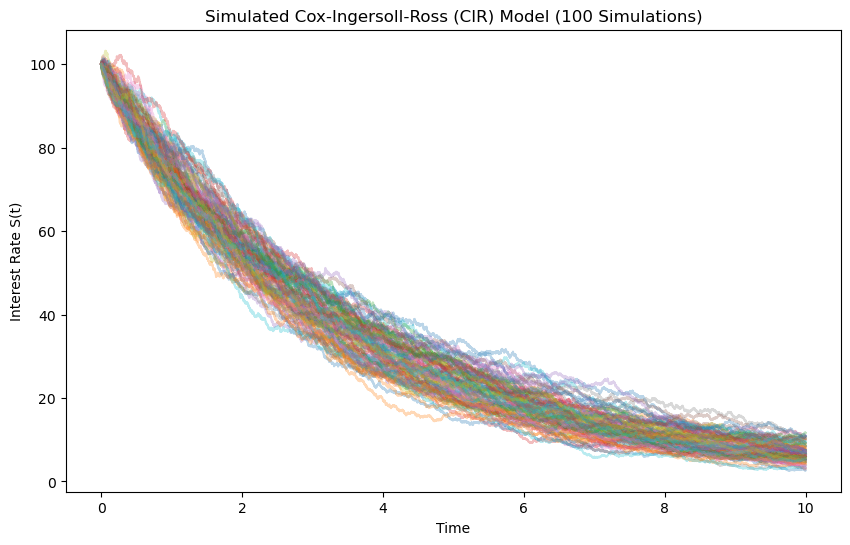

In [28]:
# Plot 100 CIR paths on the same figure
plt.figure(figsize=(10, 6))
for _ in range(100):
    time_points, S_t = CIR(Time, N_steps, dt, mu, k, theta, S_0, sigma)
    plt.plot(time_points, S_t, alpha=0.3)

plt.title("Simulated Cox-Ingersoll-Ross (CIR) Model (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Interest Rate S(t)")
plt.show()

In [92]:
# Heston model 



                                                ** Heston model ** 

$$
dS_t = rS_tdt + \sqrt{\sigma_t} S_tdW_t^1 \\
d\sigma_t = k(\theta - \sigma_t^2)dt + \xi \sigma_t dW_t^2 \\
Cov(dW_t^1,dW_t^2) = \rho dt 
$$

$k$: speed of mean-reversion    \
 $\theta$ : Long Run Equilibrium Level of Volatility  \
 $\sigma$ : volatility parameter  \
 $\rho$ : Correlation between the asset and the asset’s volatility  \
 $\xi$ : Volatility of volatility (vol of vol)  \
 $\sigma_0 $: initial level of volatility 

Text(0.5, 1.0, 'Correlated Random Variables')

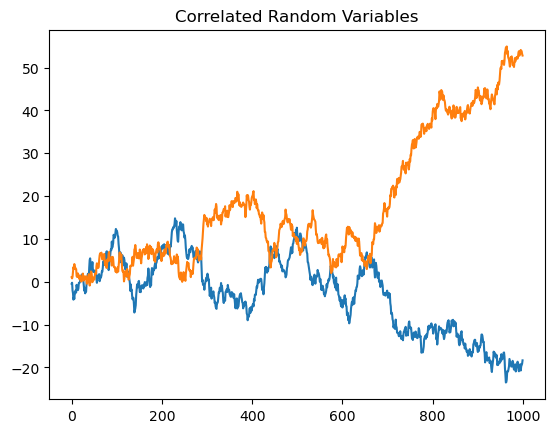

In [7]:
# Set parameters
rho = -0.7
Ndraws = 1000
mu = np.array([0,0])
cov = np.array([[1, rho] , [rho , 1]])

W = np.random.multivariate_normal(mu, cov, size=Ndraws).cumsum

plt.plot(W.cumsum(axis=0));
plt.title('Correlated Random Variables')


In [8]:
# Set parameters
rho = -0.7
Ndraws = 10000  # Matches N_steps
mu = np.array([0, 0])
cov = np.array([[1, rho], [rho, 1]])

# Generate correlated Brownian increments
W = np.random.multivariate_normal(mu, cov, size=Ndraws)

# Heston model parameters
Time = 10           # Total time T
N_steps = 10000     # Number of steps N
dt = Time / N_steps # Time increment
k =0.01            # Mean reversion speed for volatility
theta = 0.02           # Long-term mean of volatility
S_0 = 100           # Initial stock price
sigma_0 = 0.02       # Initial volatility
xi =0.9            # Volatility of volatility
r =0.02

In [9]:
            # Risk-free rate

# Heston process simulation function
def Heston(Time, N_steps, dt, k, theta, S_0, sigma_0, xi, W, r):
    # Initialize S_t and sigma_t arrays for this path
    S_t = np.zeros(N_steps)
    sigma_t = np.zeros(N_steps)
    S_t[0] = S_0
    sigma_t[0] = sigma_0

    # Separate W into two independent Brownian increments
    W1 = W[:, 0]  # For stock price process
    W2 = W[:, 1]  # For volatility process

    # Simulate the Heston process iteratively
    for i in range(1, N_steps):
        # Update volatility process sigma_t
        sigma_t[i] = sigma_t[i-1] + k * (theta - sigma_t[i-1]) * dt + xi * sigma_t[i-1] * W2[i-1]
        sigma_t[i] = max(sigma_t[i], 0)  # Ensure non-negative volatility

        # Update stock price process S_t
        S_t[i] = S_t[i-1] + r * S_t[i-1] * dt + np.sqrt(sigma_t[i]) * S_t[i-1] * W1[i-1]

    # Time points for plotting
    time_points = np.linspace(0, Time, N_steps, endpoint=True)
    return time_points, S_t

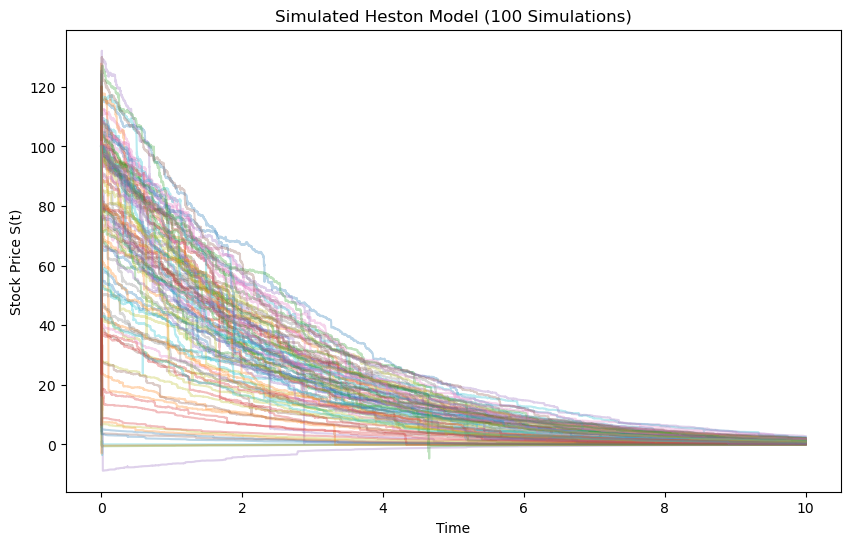

In [10]:
# Plot 100 Heston paths on the same figure
plt.figure(figsize=(10, 6))
for _ in range(100):
    # Generate new Brownian increments for each path
    W = np.random.multivariate_normal(mu, cov, size=N_steps)
    time_points, S_t = Heston(Time, N_steps, dt, k, theta, S_0, sigma_0, xi, W, r)
    plt.plot(time_points, S_t, alpha=0.3)
    
# Plot formatting
plt.title("Simulated Heston Model (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()

In [ ]:
#  Stochastic Alpha Beta Rho(SABR) Model



                                                **  Stochastic Alpha Beta Rho ** 

$$
dF_t = \sigma_t F_t^\beta dW_t^1 \\
d\sigma_t = \alpha \sigma_t dW_t^2 \\
Cov(dW_t^1,dW_t^2) = \rho dt 
$$

$k$: speed of mean-reversion    \
 $\alpha$ : Volatility of volatility (vol of vol)  \
 $\beta$ :  CEV Exponent. If $\beta$ =1, the model resembles a Black-Scholes-like process  \
 If 0< $\beta$ < 1,the model allows for "local" volatility, where the volatility depends on the asset price.  \
 If $\beta$ = 0  the volatility becomes constant and is independent of the asset price. \
 $\rho$ : Correlation between the asset and the asset’s volatility  \
 $\sigma_0 $: initial level of volatility 

In [5]:
# Set parameters for Correlated Brownian motions 

rho = 0.9  # Correlation between stock price and volatility
mu = np.array([0, 0])  # Mean vector for Brownian motion
cov = np.array([[1, rho], [rho, 1]])  # Covariance matrix for correlated Brownian motions


In [6]:
# Model parameters for the SABR
dF_0 = 100        # Initial stock price
Ndraws = 1000     # Number of time steps
beta = 0        # Elasticity parameter
sigma_0 = 0.1       # Initial volatility
T = 0.5           # Total time
alpha = 0.1       # Volatility of volatility


In [7]:
# Function definition
def SABR(T, Ndraws, W, alpha, dF_0, sigma_0, beta): 
    dF_t = np.zeros(Ndraws)
    dF_t[0] = dF_0
    
    sigma_t = np.zeros(Ndraws)
    sigma_t[0] = sigma_0
    
    # Separate W into two Brownian increments
    W1 = W[:, 0]  # For volatility process
    W2 = W[:, 1]  # For stock price process
    
    # Generate path
    for i in range(1, Ndraws):
        # Volatility process path
        sigma_t[i] = sigma_t[i-1] + alpha * sigma_t[i-1] * W1[i]
        
        # Stock price process path
        dF_t[i] = dF_t[i-1] + sigma_t[i] * dF_t[i-1]**beta * W2[i]
        
    # Time points for plotting
    time_steps = np.linspace(0, T, Ndraws, endpoint=True)
    return time_steps, dF_t


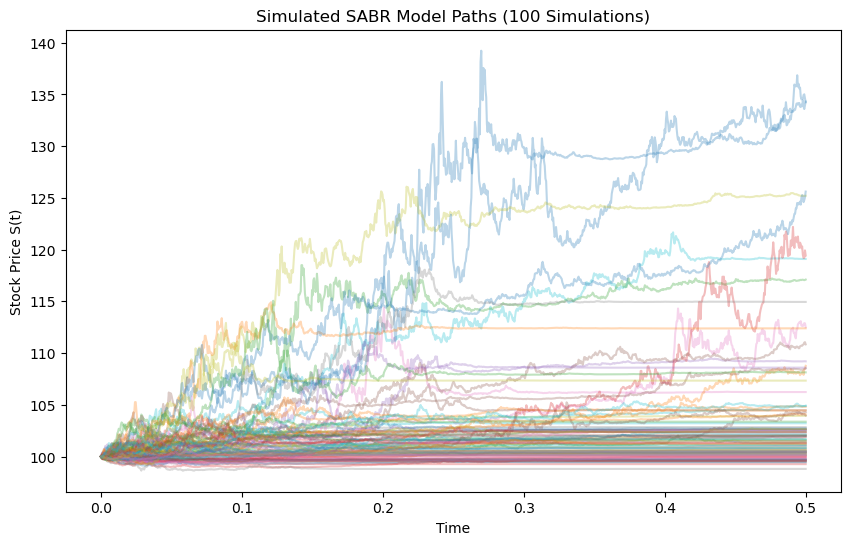

In [124]:
# Plot 100 SABR paths on the same figure
plt.figure(figsize=(10, 6))
for _ in range(100):
    # Generate correlated Brownian increments for each path
    W = np.random.multivariate_normal(mu, cov, size=Ndraws)
    
    # Call SABR function
    time_steps, dF_t = SABR(T, Ndraws, W, alpha, dF_0, sigma_0, beta)
    
    # Plot path
    plt.plot(time_steps, dF_t, alpha=0.3)

# Plot formatting
plt.title("Simulated SABR Model Paths (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()

In [116]:
# Merton’s Jump Diffusion model

# We times it by S_t as it has  proportional changes in asset prices.


                                                **  Merton’s Jump Diffusion model ** 
$$
dS_t = r S_t + \sigma S_t dW_t +(e^{\alpha + y \epsilon} -1)S_t dq  \\
y \sim U(0,1)  \\
$$Discretisized model:$$ \\
S_{i+1} = S_i ( exp( ( \mu - \frac{\sigma^2}{2})\Delta t + \sigma Nomal(0,\sqrt{\Delta t})))\left\{
    \begin {aligned}
         & e{^{Normal(\nu , \sigma^2)}} \quad & for,y <  \lambda \Delta t  \\
         & 1  \quad &  else, 1 - \lambda \Delta t                   
    \end{aligned}
\right.
$$ 


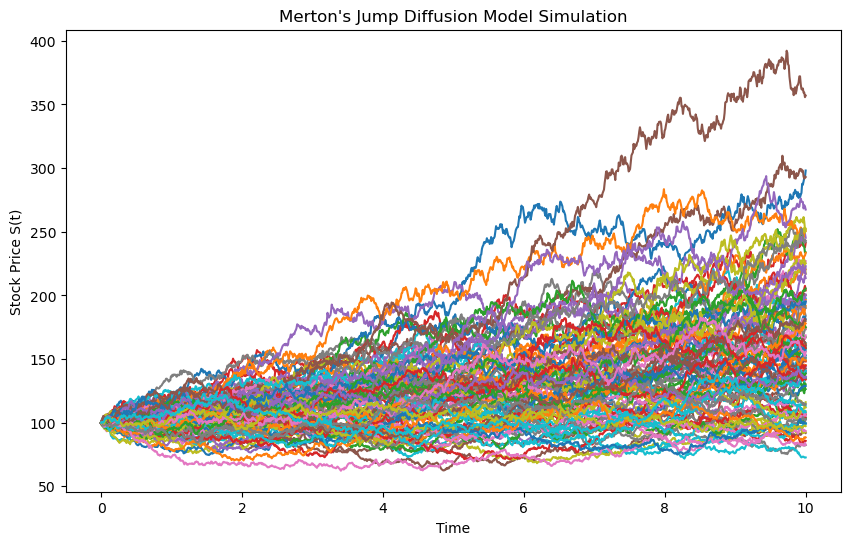

In [33]:

# Model parameters for the Jump Diffusion model
dS_0 = 100        # Initial stock price
Nsteps = 1000     # Number of time steps
r = 0.5           # Risk-free rate
mu = 0.05
sigma = 0.1       # Volatility
v = 0.03          # Mean of jump size
jump_volatility = 0.02  # Standard deviation of jump size
T = 10            # Total time
Lambda = 0.01     # Jump frequency
dt = T / Nsteps   # Time step size

def Merton_Jump_Diffusion(dS_0, mu, sigma, v, jump_volatility, T, Lambda, dt):
    S_t = np.zeros(Nsteps)
    S_t[0] = dS_0
    x_axis = np.linspace(0, T, Nsteps)
    
    for i in range(1, Nsteps):
        # Generate random variables for jump and Brownian motion
        y = np.random.uniform(0, 1)            # Uniform variable for jump decision
        Dw = np.random.normal(0, np.sqrt(dt))  # Brownian increment
        z = np.random.normal(v, jump_volatility)  # Jump size
        
        # Update S_t with or without jump
        if y < Lambda * dt:
            S_t[i] = S_t[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Dw + z)
        else:
            S_t[i] = S_t[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Dw)
            
    return x_axis, S_t

# Plotting the simulated jump diffusion process
plt.figure(figsize=(10, 6))
for _ in range(100):
    time_points, S_t = Merton_Jump_Diffusion(dS_0, mu, sigma, v, jump_volatility, T, Lambda, dt)
    plt.plot(time_points, S_t)

plt.title("Merton's Jump Diffusion Model Simulation")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()

In [19]:
# The Stochastic Volatility Plus Jumps (SVJ) model


                                                **  Merton’s Jump Diffusion model ** 
$$
dS_t = r S_t + \sqrt{\sigma} S_t dW_t +(e^{\alpha + y \epsilon} -1)S_t dq  \\
d\sigma = k(\theta - \sigma_t^2)dt + \xi \sigma_t dW_t^2   \\
Cov(dW_t^1,dW_t^2) =\rho dt  \\
$$Discretisized model:$$ \\
S_{i+1} = S_i  exp( ( \mu - \frac{\sigma^2}{2})\Delta t + \sigma Nomal(0,\sqrt{\Delta t}))\left\{
    \begin {aligned}
         & e{^{Normal(\nu , \sigma^2)}} \quad & for,y <  \lambda \Delta t  \\
         & 1  \quad &  else, 1 - \lambda \Delta t                   
    \end{aligned}
\right.
$$ 

$$
\sigma_t = \sigma_{t-1} + k(\theta - \sigma_t^2)dt + \xi \sigma_t Nomal(0,\sqrt{\Delta t})
$$

$$
Cov(W_t^1,W_t^2)= \rho dt 
$$


In [35]:
# Set parameters for Correlated Brownian motions 
rho = 0.9  # Correlation between stock price and volatility
mu_vector = np.array([0, 0])  # Mean vector for Brownian motion
cov = np.array([[1, rho], [rho, 1]])  # Covariance matrix for correlated Brownian motions

# Model parameters for the Jump Diffusion model
dS_0 = 100        # Initial stock price
Nsteps = 1000     # Number of time steps
r = 0.5           # Risk-free rate
mu_stock = 0.05   # Drift of stock price
v = 0.03          # Mean of jump size
T = 10            # Total time
alpha = 0.1       # Volatility of volatility
Lambda = 0.01     # Jump frequency

dt = T / Nsteps   # Time step size

# Volatility parameters
sigma_0 = 0.1     # Initial volatility
k = 0.03          # Mean reversion speed
theta = 0.05      # Long-term volatility



In [36]:

def Merton_Jump_Diffusion(dS_0, r, mu_stock, sigma_0, v, T, alpha, Lambda, dt, k, theta, W):
    
    S_t = np.zeros(Nsteps)
    S_t[0] = dS_0
    x_axis = np.linspace(0, T, Nsteps)
    
    # Initialize sigma 
    sigma_t = np.zeros(Nsteps)
    sigma_t[0] = sigma_0
    
    # Separate W into two Brownian increments
    W1 = W[:, 0]  # For volatility process
    W2 = W[:, 1]  # For stock price process
    
    # Simulation loop
    for i in range(1, Nsteps):
        # Generate random variables for jump and Brownian motion
        y = np.random.uniform(0, 1)  # Uniform random variable for jump decision
        z = np.random.normal(v, sigma_t[i-1]**2)  # Jump size
        
        # Update sigma_t with mean-reverting component and stochastic term
        sigma_t[i] = sigma_t[i-1] + k * (theta - sigma_t[i-1]) * dt + alpha * np.sqrt(dt) * W1[i]
        
        # Calculate S_t based on whether a jump occurs
        if y < Lambda * dt:
            # Jump diffusion update for S_t when jump occurs
            S_t[i] = S_t[i-1] * np.exp((mu_stock - 0.5 * sigma_t[i]**2) * dt + sigma_t[i] * np.sqrt(dt) * W2[i] + z)
        else:
            # Standard diffusion update for S_t
            S_t[i] = S_t[i-1] * np.exp((mu_stock - 0.5 * sigma_t[i]**2) * dt + sigma_t[i] * np.sqrt(dt) * W2[i])
    
    return x_axis, S_t

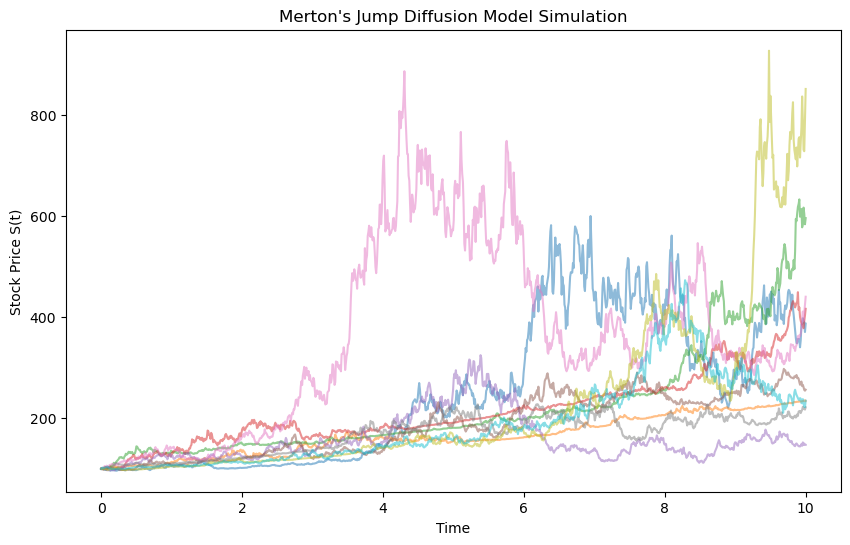

In [37]:
# Plotting the simulated jump diffusion process
plt.figure(figsize=(10, 6))
for _ in range(10):
    # Generate correlated Brownian increments for each path
    W = np.random.multivariate_normal(mu_vector, cov, size=Nsteps)
    
    x_axis, S_t = Merton_Jump_Diffusion(dS_0, r, mu_stock, sigma_0, v, T, alpha, Lambda, dt, k, theta, W)
    
    plt.plot(x_axis, S_t, alpha=0.5)

plt.title("Merton's Jump Diffusion Model Simulation")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()

In [16]:
#  variance gamma (VG) model


                                                **  variance gamma (VG) model ** 

$$
ln(S_t) = ln(S_0) + \theta G_t + \sigma W_{G_t} + vG_t \\
$$

$S_t$: is the asset price at time at time t    \
 $\theta$ :  represents the drift or trend in returns  \
 $\sigma$ :  controls the volatility  \
 $v $ :  is the variance rate of the Gamma process  \
 $G_t $: is a Gamma process with mean t and variance  \
 $W_{G_t} $:is a Brownian motion subordinated to the Gamma process G_t, providing the additional stochastic term for jumps.
 

$$
ln(S_{t+1}) = ln(S_{t_i}) + \theta \Delta G_{i+1} + \sigma \sqrt{\Delta G_{i+1}}Z_{i+1} + v\Delta G_{i+1} \\
$$


$$
$$Where :$$\Delta G_{i+1} \sim Gamma(\frac{\Delta t}{v}, v) , Z_{i+1} = N(0,1)\\
$$

In [45]:
# Parameters for variance gamma model
# VG model parameters
S_0 = 100           # Initial stock price
theta = 0.05        # Drift term
sigma = 0.2         # Volatility parameter
nu = 0.1            # Variance rate of the Gamma process
T = 1.0             # Total time
Nsteps = 1000       # Number of steps
dt = T / Nsteps     # Time step size

S_t[0]=S_0
log_S_t = np.log(S_0)

plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

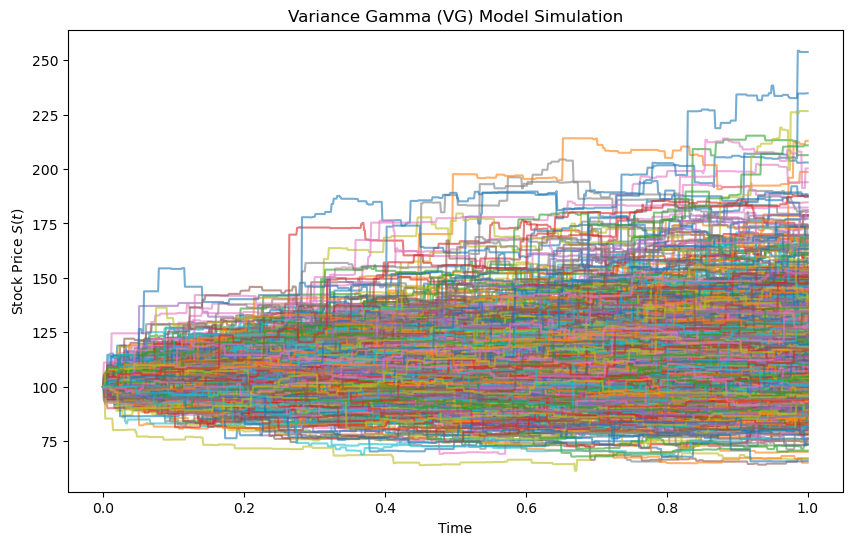

In [47]:
def variance_gamma(S_0, theta, sigma, nu, T, Nsteps):
    S_t = np.zeros(Nsteps)
    S_t[0] = S_0
    log_S_t = np.log(S_0)
    
    for i in range(1, Nsteps):
        # Generate Gamma and Normal increments for each step 
        dG = np.random.gamma(dt / nu, nu)  # Gamma increment
        Z = np.random.normal(0, 1)         # Standard normal for Brownian part
        
        # Update log-price according to VG model
        log_S_t += theta * dG + sigma * np.sqrt(dG) * Z + nu * dG
        S_t[i] = np.exp(log_S_t)           # Convert log-price back to price
    
    return S_t
# Plotting the simulated VG path

plt.figure(figsize=(10, 6))
for _ in range(1000):  # Simulate multiple paths
    S_t = variance_gamma(S_0, theta, sigma, nu, T, Nsteps)
    plt.plot(np.linspace(0, T, Nsteps), S_t, alpha=0.6)

plt.title("Variance Gamma (VG) Model Simulation")
plt.xlabel("Time")
plt.ylabel("Stock Price $S(t)$")
plt.show()

In [5]:
def generate_ar1(phi, sigma, n, x0=0):
    """
    Generates an AR(1) time series.

    Parameters:
    - phi: The autoregressive parameter
    - sigma: The standard deviation of the noise term
    - n: Number of points in the time series
    - x0: Initial value of the time series (default is 0)

    Returns:
    - A numpy array containing the AR(1) time series.
    """
    # Initialize the time series array
    x = np.zeros(n)
    x[0] = x0
    
    # Generate the white noise
    noise = np.random.normal(0, sigma, size=n)
    
    # Generate the AR(1) process
    for t in range(2, n):
        x[t] = phi * x[t-1] + noise[t]
        #x[t] = phi * x[t-1]+phi*x[t-2] + noise[t] AR(2)
    return x

# Parameters
phi = 0.45  # AR(1) parameter
sigma = 1.0  # Standard deviation of noise
n = 100  # Length of the time series

# Generate the AR(1) time series
ar1_series = generate_ar1(phi, sigma, n)

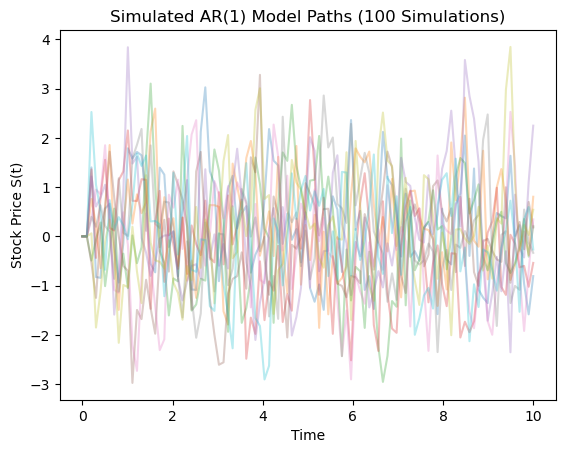

In [12]:
time_steps = np.linspace(0,10,100,endpoint=True)
for _ in range(10): 
    x = generate_ar1(phi, sigma, n)
        # Plot path
    plt.plot(time_steps, x, alpha=0.3)

# Plot formatting
plt.title("Simulated AR(1) Model Paths (100 Simulations)")
plt.xlabel("Time")
plt.ylabel("Stock Price S(t)")
plt.show()

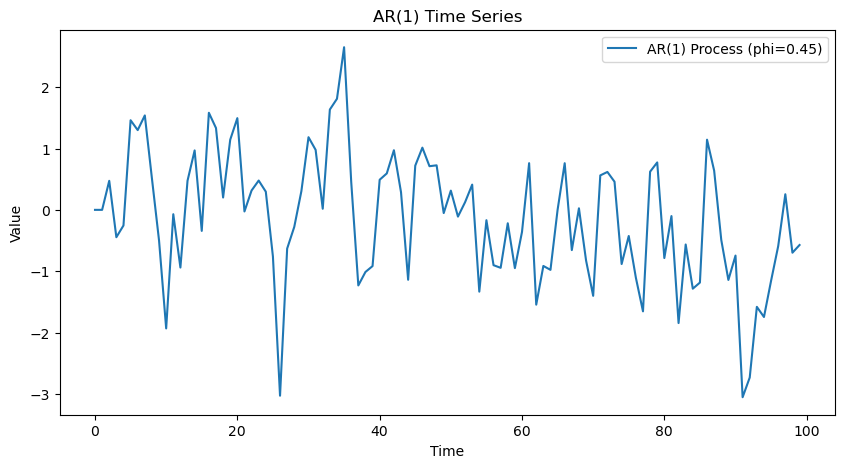

In [153]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(ar1_series, label=f'AR(1) Process (phi={phi})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Time Series')
plt.legend()
plt.show()

In [ ]:
VAR USING MONTE CARLO 

In [ ]:
# Monte Carlo Simulation for VaR
# Assumptions:

# 1.The asset returns are normally distributed (a common assumption, though not perfect).
# We know the asset's historical mean return and standard deviation (volatility).
# Steps to Calculate VaR Using Monte Carlo:
# Estimate the mean and standard deviation of the asset’s returns using historical data.
# 2. Generate random future returns using these estimates, assuming a normal distribution.
# 3. Simulate multiple portfolio values using these returns.
# 4. Calculate VaR as the percentile loss from these simulated values.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Set up the initial parameters
# Let's assume these values are known or estimated from historical data
initial_investment = 1000000  # 1 million dollars
mean_return = 0.0005          # daily mean return (0.05%)
volatility = 0.01             # daily volatility (1%)
confidence_level = 0.95       # 95% confidence level
time_horizon = 1              # 1-day horizon for simplicity

# Step 2: Monte Carlo simulation
# Number of simulations
n_simulations = 10000

# Generate random returns based on the mean and volatility
random_returns = np.random.normal(mean_return, volatility, n_simulations)
print("This is the random returns of our generator: ",random_returns)
print("The length is ",len(random_returns))


This is the random returns of our generator:  [-0.00128895  0.0149238   0.00325896 ... -0.02583779 -0.01396154
  0.01820399]
The length is  10000


In [30]:
# Simulate the portfolio values after the time horizon (1 day)
simulated_portfolio_values = initial_investment * (time_horizon + random_returns)
print("simulated_portfolio_values are ",simulated_portfolio_values)

simulated_portfolio_values are  [ 998711.05147831 1014923.79572342 1003258.95930205 ...  974162.20555663
  986038.46092373 1018203.99454724]


In [31]:
# Step 3: Calculate the losses
losses = initial_investment - simulated_portfolio_values

print("Loses are ",losses)

Loses are  [  1288.94852169 -14923.79572342  -3258.95930205 ...  25837.79444337
  13961.53907627 -18203.99454724]


VaR at 95.0% confidence level is: $-17,013.85


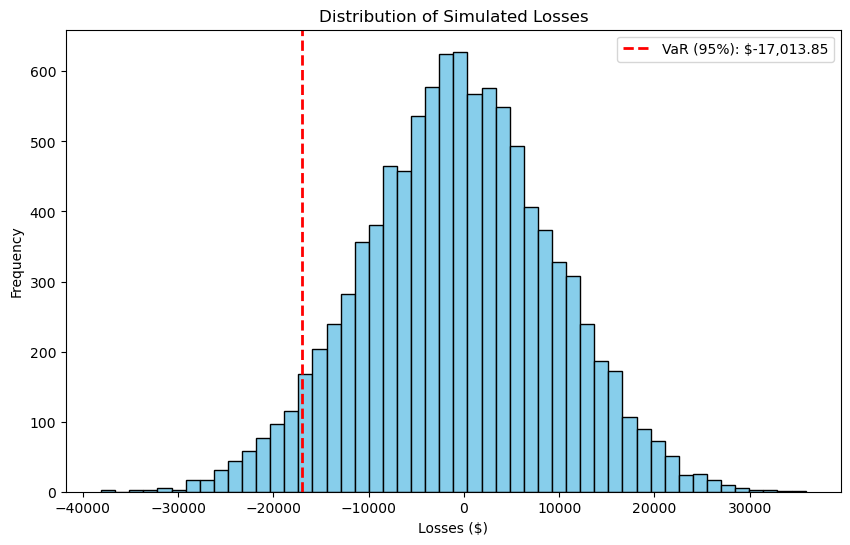

In [32]:
# Step 4: Determine the VaR
VaR_95 = np.percentile(losses, (1 - confidence_level) * 100)

print(f"VaR at {confidence_level*100}% confidence level is: ${VaR_95:,.2f}")

# Optional: Visualize the distribution of losses
plt.figure(figsize=(10, 6))
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.axvline(VaR_95, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): ${VaR_95:,.2f}')
plt.title('Distribution of Simulated Losses')
plt.xlabel('Losses ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [3]:
# EXOTIC DERIVATIVES
# ASIAN OPTION

spot = 40
strike = 40
T = 0.5
r = 0.05
sigma = 0.2
n_sims = 100000
n_steps = 100

dt = T / n_steps

# Perform geometric Brownian motion:
# Make a matrix price_factors representing the ratio of each price
# to the previous timestep. We treat rows as representing simulations,
# columns as representing timesteps
rands = np.random.normal(size=(n_sims, n_steps))
price_factors = np.exp((r - sigma * sigma / 2) * dt + sigma * rands * np.sqrt(dt))

# Now calculate the prices using the cumulative product (along the time axis)
# of price_factors
prices = spot * np.cumprod(price_factors, axis=1)

# Calculate the Asian call payoff per simulation
payoffs = np.maximum(0, np.mean(prices, axis=1) - strike)

# Final result is the average over simulations
call_price = np.mean(payoffs)
print(call_price)

1.5976049090830748
